In [4]:
from tkinter import *
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as data


In [5]:
start = '2010-01-01'
end = '2022-12-31'

df = data.DataReader('TSLA','yahoo',start,end)
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2010-06-29,1.666667,1.169333,1.266667,1.592667,281494500.0,1.592667
2010-06-30,2.028000,1.553333,1.719333,1.588667,257806500.0,1.588667
2010-07-01,1.728000,1.351333,1.666667,1.464000,123282000.0,1.464000
2010-07-02,1.540000,1.247333,1.533333,1.280000,77097000.0,1.280000
2010-07-06,1.333333,1.055333,1.333333,1.074000,103003500.0,1.074000


In [6]:
df = df.reset_index()

In [7]:
df = df. drop(['Date', 'Adj Close'], axis = 1)

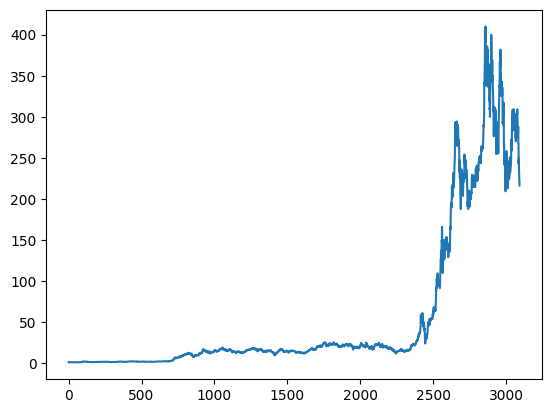

In [8]:
plt.plot(df.Close)

In [9]:
ma100 = df.Close.rolling(100).mean()
ma100

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
3089    263.625834
3090    263.441834
3091    263.257967
3092    262.948867
3093    262.747834
Name: Close, Length: 3094, dtype: float64

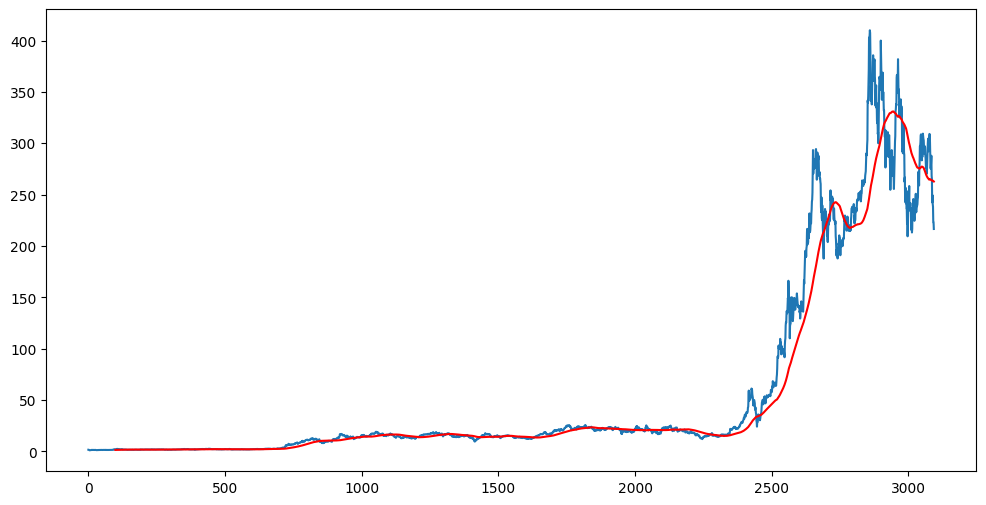

In [10]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')

In [11]:
ma200 = df.Close.rolling(200).mean()
ma200

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
3089    289.718933
3090    289.409683
3091    288.960817
3092    288.394167
3093    287.698333
Name: Close, Length: 3094, dtype: float64

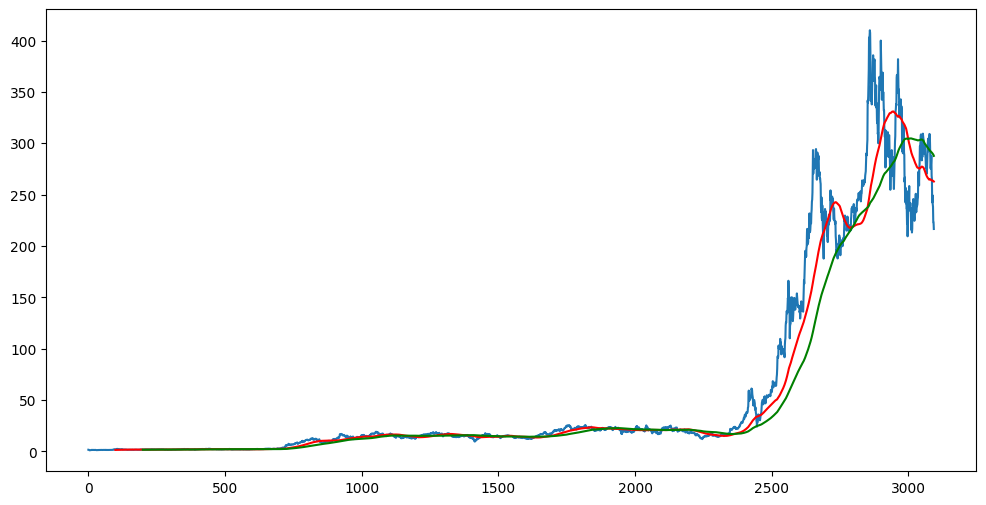

In [12]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')
plt.plot(ma200 , 'g')

In [13]:
df.shape

(3094, 5)

In [14]:
data_training = pd. DataFrame(df['Close'[0 : int(len(df) * 0.70)]])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.70): int(len(df))])
print(data_training.shape)
print(data_testing.shape)

(3094, 1)
(929, 1)


In [15]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0,1))

In [16]:
data_training_array = scaler.fit_transform(data_training)
data_training

,Close
0,1.592667
1,1.588667
2,1.464000
3,1.280000
4,1.074000
...,...
3089,240.809998
3090,238.130005
3091,223.070007
3092,222.960007


In [17]:
x_train = []
y_train = []

for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i - 100: i])
    y_train.append(data_training_array[i,0])

x_train, y_train = np.array(x_train), np.array(y_train)

In [18]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [19]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu' , return_sequences = True, 
    input_shape =(x_train.shape[1], 1)))
model.add(Dropout(0.2))

model.add(LSTM(units = 60, activation = 'relu' , return_sequences = True)) 
model.add(Dropout(0.3))

model.add(LSTM(units = 80, activation = 'relu' , return_sequences = True))
model.add(Dropout(0.4))

model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units = 1))

In [20]:
model.compile(optimizer = 'adam' , loss = 'mean_squared_error')
model.fit(x_train, y_train, epochs = 50)

Epoch 1/50
94/94 [==============================] - 29s 232ms/step - loss: 0.0119
Epoch 2/50
94/94 [==============================] - 24s 259ms/step - loss: 0.0044
Epoch 3/50
94/94 [==============================] - 22s 230ms/step - loss: 0.0037
Epoch 4/50
94/94 [==============================] - 22s 238ms/step - loss: 0.0037
Epoch 5/50
94/94 [==============================] - 25s 263ms/step - loss: 0.0032
Epoch 6/50
94/94 [==============================] - 24s 259ms/step - loss: 0.0035
Epoch 7/50
94/94 [==============================] - 24s 252ms/step - loss: 0.0025
Epoch 8/50
94/94 [==============================] - 22s 238ms/step - loss: 0.0030
Epoch 9/50
94/94 [==============================] - 22s 237ms/step - loss: 0.0030
Epoch 10/50
94/94 [==============================] - 23s 244ms/step - loss: 0.0027
Epoch 11/50
94/94 [==============================] - 23s 245ms/step - loss: 0.0027
Epoch 12/50
94/94 [==============================] - 21s 223ms/step - loss: 0.0025
Epoch 13/50
9

In [21]:
model.save('keras_model.h5')